In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving train.csv to train (2).csv


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving test.csv to test.csv


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving gender_submission.csv to gender_submission.csv


In [ ]:
data=pd.read_csv('train.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

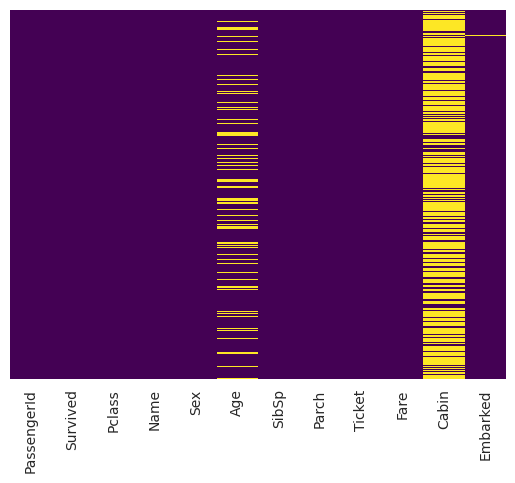

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
data.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

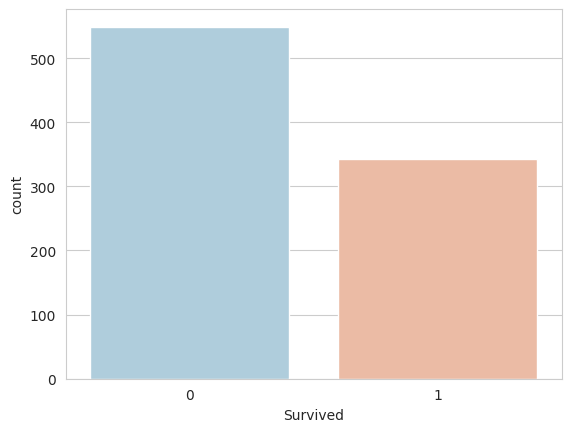

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

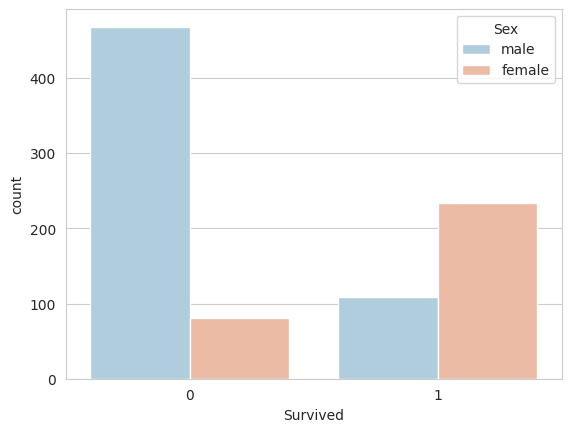

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

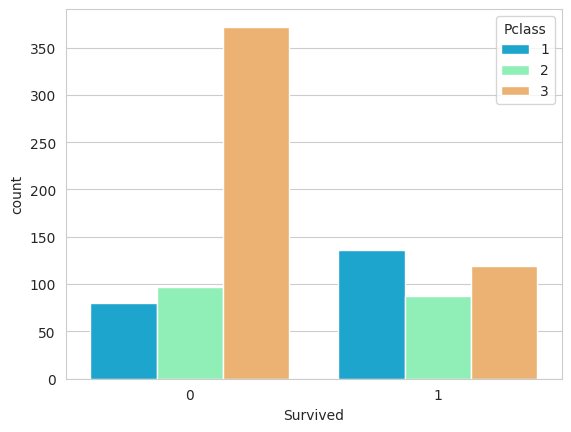

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=data,palette='rainbow')

<Axes: >

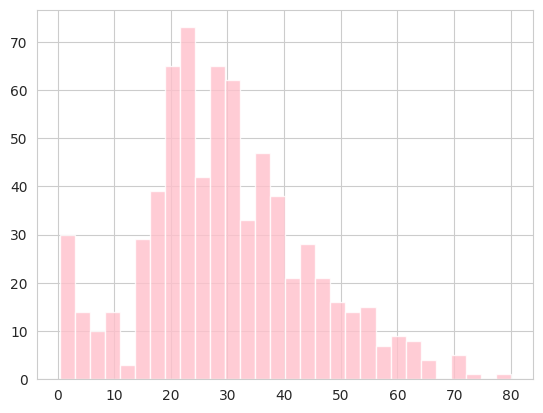

In [ ]:
data['Age'].hist(bins=30,color='pink',alpha=0.8)

<Axes: xlabel='SibSp', ylabel='count'>

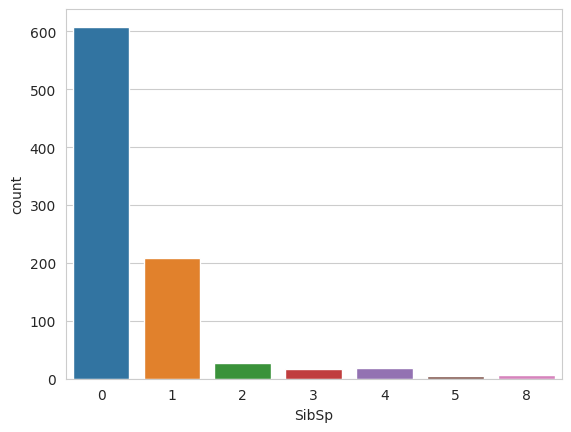

In [ ]:
sns.countplot(x='SibSp',data=data)

<Axes: xlabel='Parch', ylabel='count'>

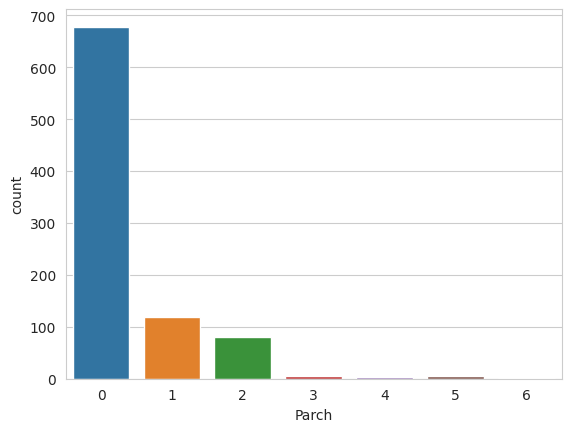

In [ ]:
sns.countplot(x='Parch',data=data)

<Axes: >

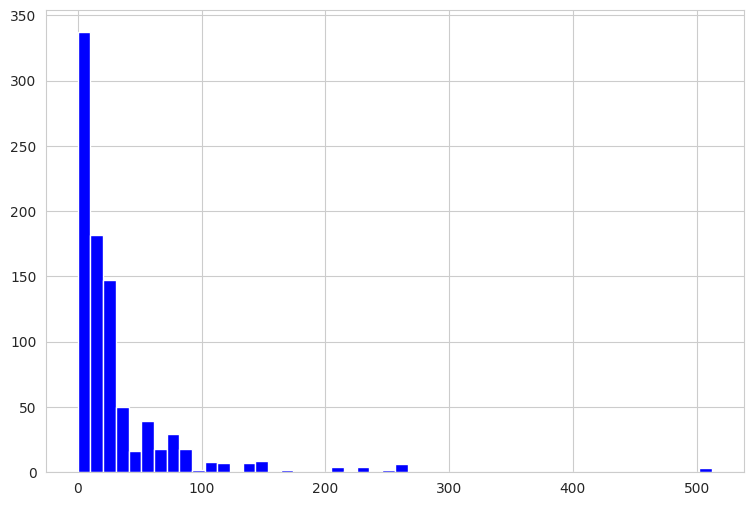

In [ ]:
data['Fare'].hist(color='blue',bins=50,figsize=(9,6))

<Axes: xlabel='Pclass', ylabel='Age'>

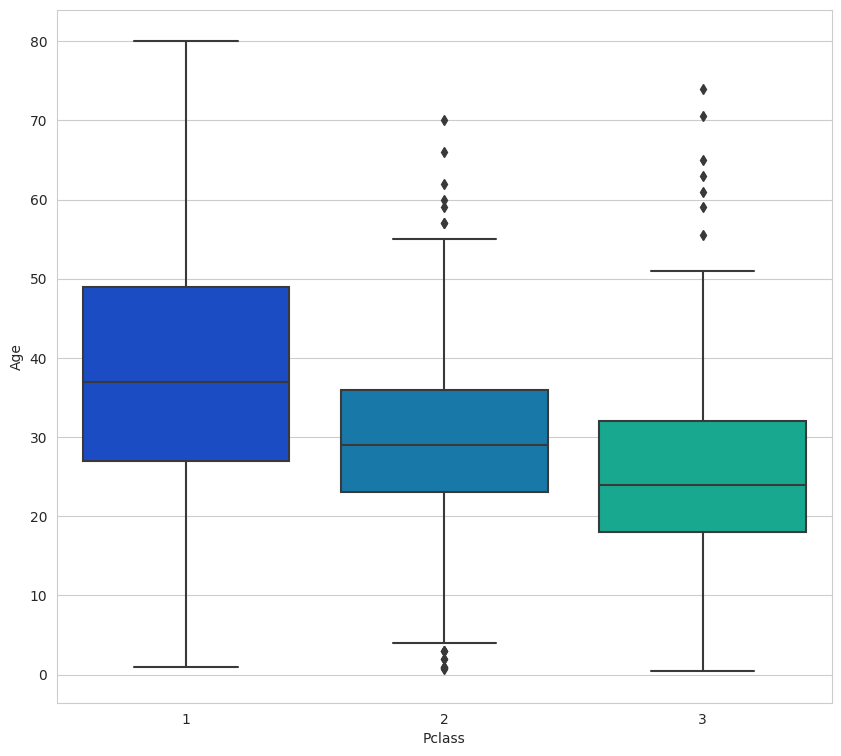

In [ ]:
plt.figure(figsize=(10, 9))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [ ]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

In [ ]:
data['Embarked'] = data['Embarked'].fillna('S')

<Axes: >

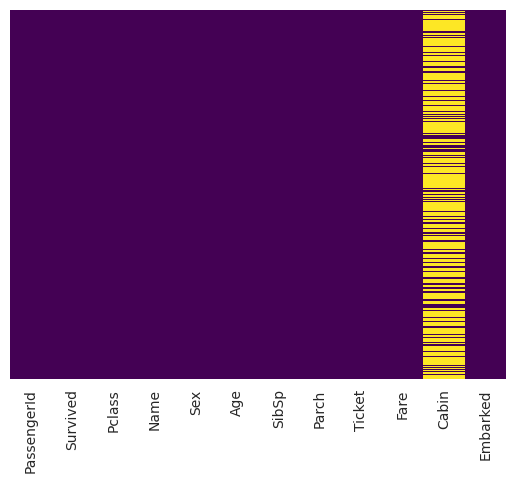

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
data.drop('Cabin',axis=1,inplace=True)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)

In [ ]:
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
data= pd.concat([data,sex,embark],axis=1)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(['Survived'],axis=1),
                                                    data['Survived'], test_size=0.10,
                                                    random_state=101)

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = logmodel.predict(x_test)
x_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
331,332,1,45.5,0,0,28.500,1,0,1
700,701,1,18.0,1,0,227.525,0,0,0
748,749,1,19.0,1,0,53.100,1,0,1
751,752,3,6.0,0,1,12.475,1,0,1
481,482,2,29.0,0,0,0.000,1,0,1


In [ ]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1])

In [ ]:
print(confusion_matrix(y_test,predictions))

[[46  5]
 [19 20]]


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.90      0.79        51
           1       0.80      0.51      0.62        39

    accuracy                           0.73        90
   macro avg       0.75      0.71      0.71        90
weighted avg       0.75      0.73      0.72        90



In [ ]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt_pred = dt_model.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,dt_pred))

[[43  8]
 [15 24]]


In [ ]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79        51
           1       0.75      0.62      0.68        39

    accuracy                           0.74        90
   macro avg       0.75      0.73      0.73        90
weighted avg       0.75      0.74      0.74        90



In [ ]:
rf= RandomForestClassifier(n_estimators=500)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500)

In [ ]:
rf_pre=rf.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,rf_pre))

[[48  3]
 [13 26]]


In [ ]:
print(classification_report(y_test,rf_pre))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        51
           1       0.90      0.67      0.76        39

    accuracy                           0.82        90
   macro avg       0.84      0.80      0.81        90
weighted avg       0.83      0.82      0.82        90



In [ ]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(n_estimators=1000)
xgboost.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
xg_pred = xgboost.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,xg_pred))

[[45  6]
 [16 23]]


In [ ]:
print(classification_report(y_test,xg_pred))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80        51
           1       0.79      0.59      0.68        39

    accuracy                           0.76        90
   macro avg       0.77      0.74      0.74        90
weighted avg       0.76      0.76      0.75        90



In [ ]:
import keras
from keras.layers import Dense
#from keras.layers import Keras2 API:Dense
from keras.models import Sequential

In [ ]:
ann  = Sequential()
ann.add(Dense(units= 32,kernel_initializer= 'uniform', activation = 'relu', input_dim=9))
ann.add(Dense(units= 32,kernel_initializer= 'uniform', activation = 'relu'))
ann.add(Dense(units= 1,kernel_initializer= 'uniform', activation = 'sigmoid'))
ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
ann.fit(x_train,y_train, batch_size=32, epochs=300,verbose= 0)

In [ ]:
ann_pred = ann.predict(x_test)
ann_pred = [ 1 if y>=0.5 else 0 for y in ann_pred]
print(ann_pred)

3/3 [==============================] - 0s 12ms/step
[0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]


In [ ]:
print(confusion_matrix(y_test,ann_pred))

[[48  3]
 [19 20]]


In [ ]:
print(classification_report(y_test,ann_pred))

              precision    recall  f1-score   support

           0       0.72      0.94      0.81        51
           1       0.87      0.51      0.65        39

    accuracy                           0.76        90
   macro avg       0.79      0.73      0.73        90
weighted avg       0.78      0.76      0.74        90



In [ ]:
test=pd.read_csv('test.csv')

<Axes: >

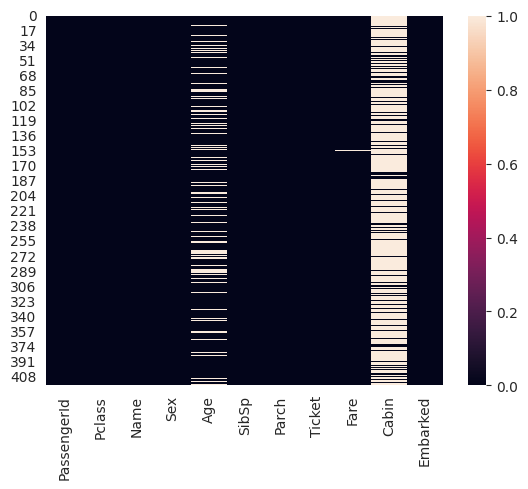

In [ ]:
sns.heatmap(test.isnull())

In [ ]:
test.drop('Cabin',axis=1,inplace=True)

In [ ]:
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

In [ ]:
sex_test = pd.get_dummies(test['Sex'],drop_first=True)
embark_test= pd.get_dummies(test['Embarked'],drop_first=True)

In [ ]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
test = pd.concat([test,sex_test,embark_test],axis=1)

In [ ]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
ann.fit(data.drop(['Survived'],axis=1),data['Survived'] , epochs=300,verbose= 0)

In [ ]:
test_prediction = ann.predict(test)
test_prediction = [ 1 if y>=0.5 else 0 for y in test_prediction]

14/14 [==============================] - 0s 2ms/step


In [ ]:
test_pred = pd.DataFrame(test_prediction, columns= ['Survived'])

In [ ]:
new_test = pd.concat([test, test_pred], axis=1, join='inner')

In [ ]:
new_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
0,892,3,34.5,0,0,7.8292,1,1,0,0
1,893,3,47.0,1,0,7.0000,0,0,1,0
2,894,2,62.0,0,0,9.6875,1,1,0,0
3,895,3,27.0,0,0,8.6625,1,0,1,0
4,896,3,22.0,1,1,12.2875,0,0,1,1


In [ ]:
df= new_test[['PassengerId' ,'Survived']]

In [ ]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
df.to_csv('predictions.csv' , index=False)

In [ ]:
prediction_on_test_data = accuracy_score(test_pred,test_prediction)